In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
df  = pd.read_csv("../artifacts/raw/data.csv")

In [15]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [16]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [17]:
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='str')

In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      100000 non-null  str    
 1   Machine_ID                     100000 non-null  int64  
 2   Operation_Mode                 100000 non-null  str    
 3   Temperature_C                  100000 non-null  float64
 4   Vibration_Hz                   100000 non-null  float64
 5   Power_Consumption_kW           100000 non-null  float64
 6   Network_Latency_ms             100000 non-null  float64
 7   Packet_Loss_%                  100000 non-null  float64
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64
 9   Production_Speed_units_per_hr  100000 non-null  float64
 10  Predictive_Maintenance_Score   100000 non-null  float64
 11  Error_Rate_%                   100000 non-null  float64
 12  Efficiency_Status              100000 non-

### DATA PROCESSING

In [19]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"] , errors='coerce')

In [20]:
categorical_cols = ['Operation_Mode','Efficiency_Status']
for col in categorical_cols:
    df[col] = df[col].astype('category')

### EDA

In [21]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

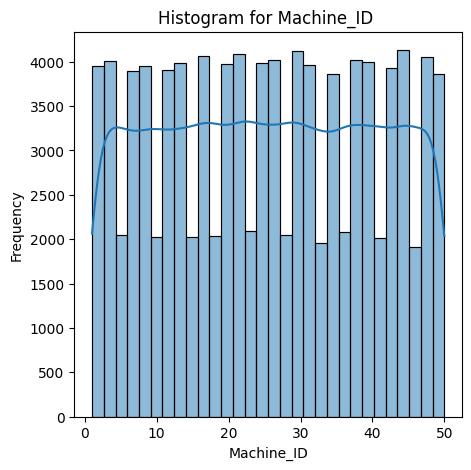

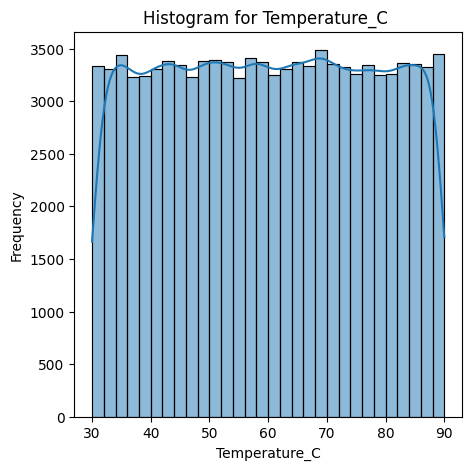

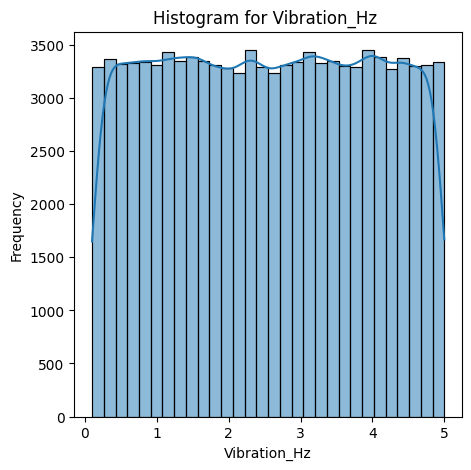

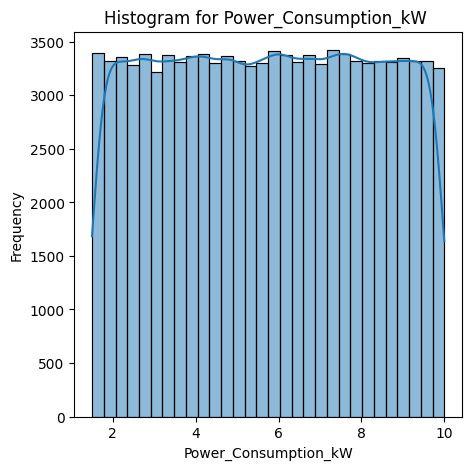

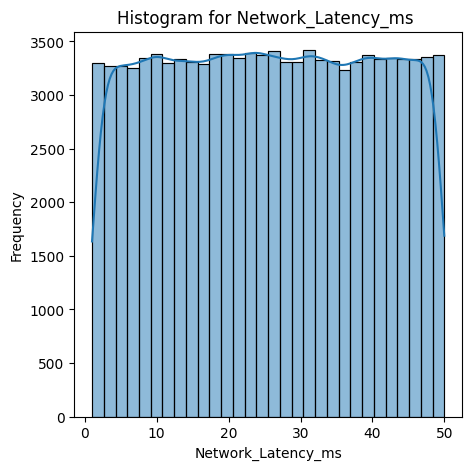

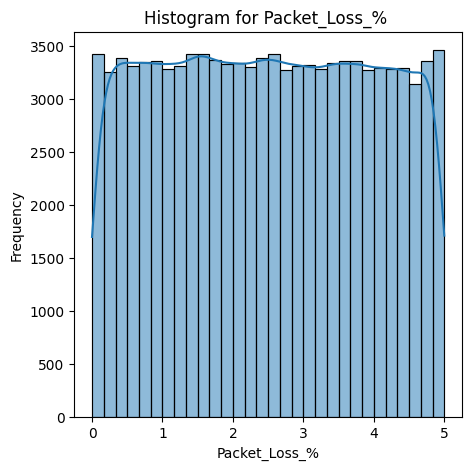

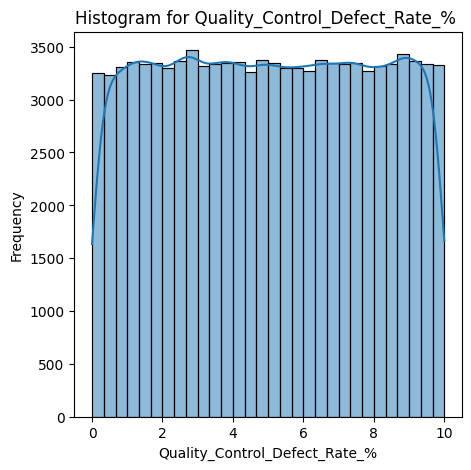

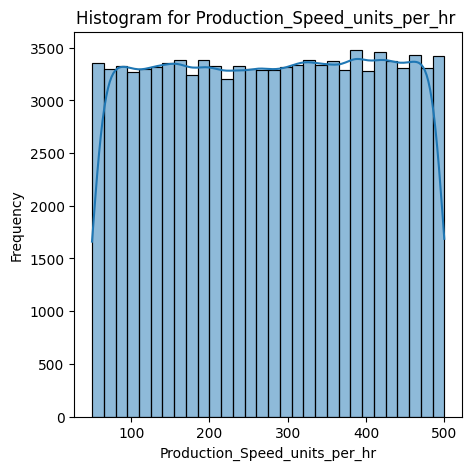

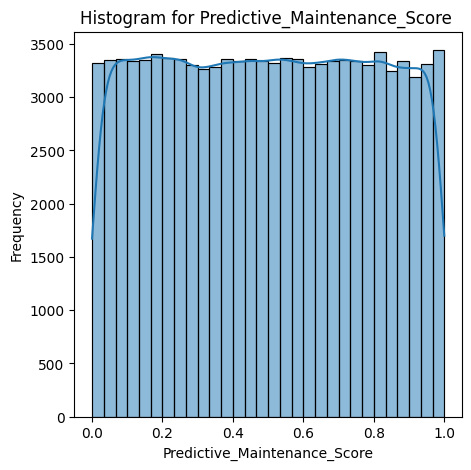

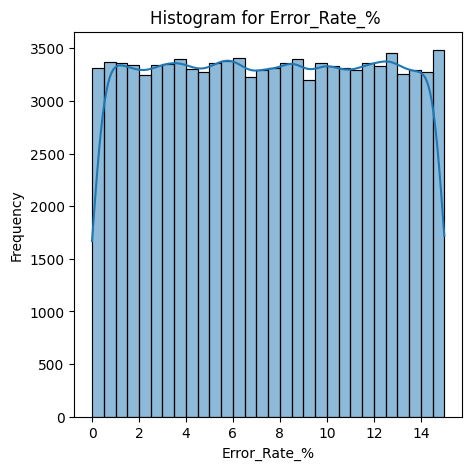

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df[col] , kde=True , bins=30)
    plt.title(f"Histogram for {col} ")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.show()

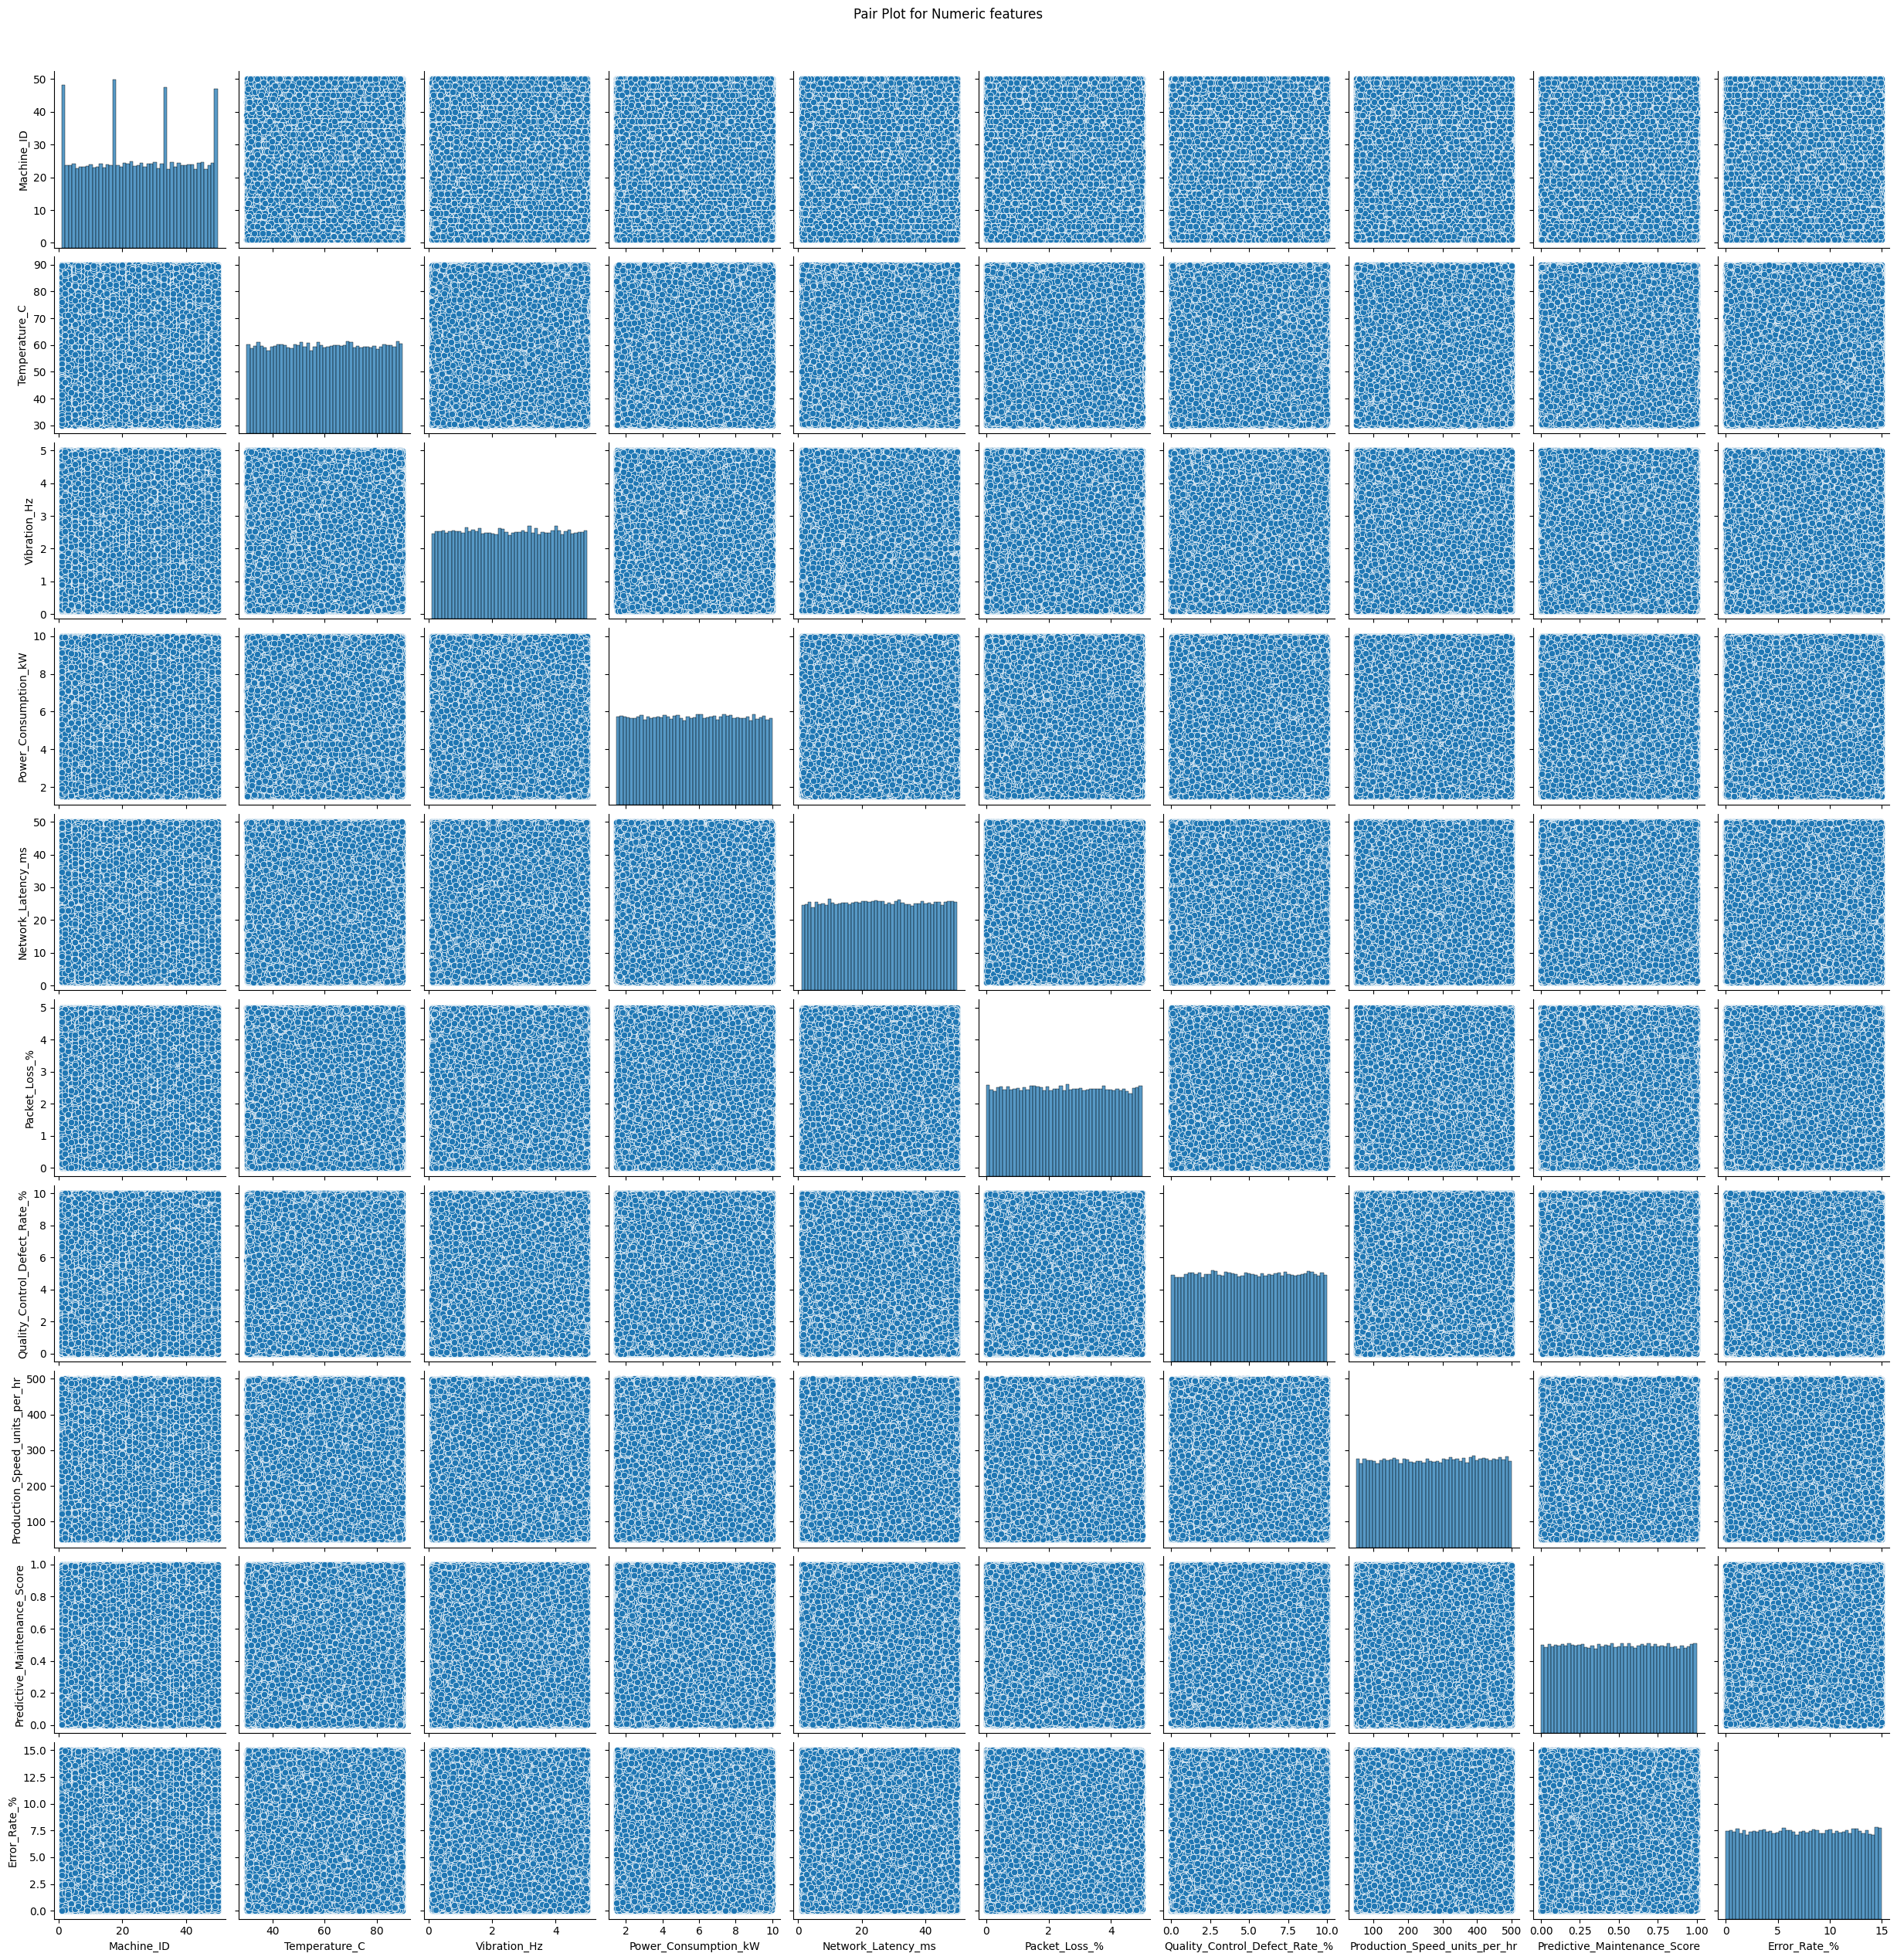

In [23]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot for Numeric features' , y=1.02)
plt.show()

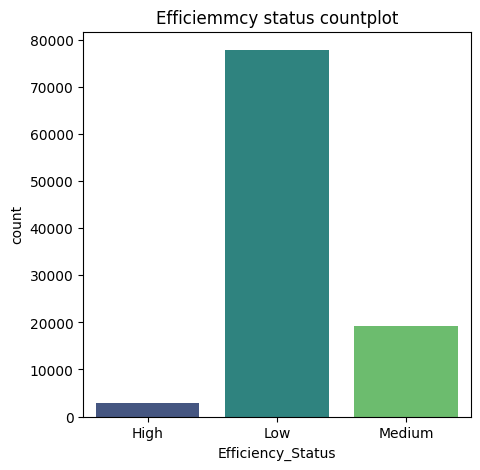

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Efficiency_Status' , data=df , palette='viridis')
plt.title("Efficiemmcy status countplot")
plt.show()

### FE

In [25]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [26]:
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day

df["Hour"] = df["Timestamp"].dt.hour

In [27]:
df.drop(columns=["Timestamp","Machine_ID"] , inplace=True)

In [28]:
df.shape

(100000, 15)

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
df["Efficiency_Target"] = label_encoder.fit_transform(df["Efficiency_Status"])

In [40]:
label_encoder = LabelEncoder()
df["Operation_Mode"] = label_encoder.fit_transform(df["Operation_Mode"])

In [41]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [42]:
df["Efficiency_Target"].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [43]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_Target'],
      dtype='str')

In [44]:
features = [
    'Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%','Year', 'Month', 'Day', 'Hour'
]

In [45]:
X = df[features]

In [46]:
y = df["Efficiency_Target"]

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, test_size=0.2 , random_state=42 , stratify=y)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score , classification_report

In [55]:
accuracy_score(y_test,y_pred)

0.91655

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.92     20000



In [57]:
### Permutation imprtance

In [58]:
from sklearn.inspection import permutation_importance

In [59]:
result = permutation_importance(clf , X_test , y_test , n_repeats=10 , random_state=42 , n_jobs=-1)

In [60]:
importance_df = pd.DataFrame({
    'Feature' : features,
    'Importances' : result.importances_mean
})

In [61]:
importance_df.sort_values(by='Importances', ascending=False)

Feature  Importances
9                    Error_Rate_%     0.234895
7   Production_Speed_units_per_hr     0.117720
4              Network_Latency_ms     0.000235
3            Power_Consumption_kW     0.000150
6   Quality_Control_Defect_Rate_%     0.000150
13                           Hour     0.000145
1                   Temperature_C     0.000075
8    Predictive_Maintenance_Score     0.000015
2                    Vibration_Hz     0.000005
10                           Year     0.000000
12                            Day    -0.000055
5                   Packet_Loss_%    -0.000085
0                  Operation_Mode    -0.000180
11                          Month    -0.000440